In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.117186,-0.666839,-2.849642,0.943453,0.873877,0
1,0.806469,1.551332,-0.225611,-0.259930,0.122262,1
2,1.434472,-0.426138,-2.031319,1.457633,0.272935,1
3,-0.813028,3.179133,3.350965,-4.452406,2.096048,0
4,2.381951,1.687952,-0.543699,-1.217665,3.298783,0


In [5]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [11]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [12]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [13]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-11-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [14]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-11-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-11-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col3', 'target'], dtype='object')
Index(['col2', 'col4', 'target'], dtype='object')
Index(['col4', 'col2', 'target'], dtype='object')


In [17]:
df3

,col4,col2,target
14,-1.150917,1.501819,0
65,3.028964,-2.820921,1
88,-2.105321,1.538082,1
49,-0.246287,-0.850794,1
42,0.215065,-0.277926,1
6,0.789338,0.267947,1
73,-0.595508,-1.194578,1
26,-3.579196,0.927018,0
75,-2.271816,0.372283,0
62,1.172309,-0.793538,1


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [19]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [20]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[0] <= -0.111\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.25, 0.625, 'x[0] <= -0.788\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.375, 0.375, 'x[0] <= -0.54\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.625, 'x[1] <= -3.443\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]')]

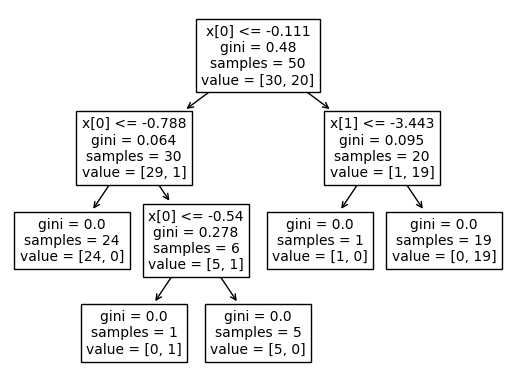

In [21]:
plot_tree(clf1)

[Text(0.5, 0.9, 'x[1] <= -0.341\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2, 0.7, 'x[0] <= -1.506\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.5, 'x[0] <= -0.011\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.2, 0.3, 'x[0] <= -0.125\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.8, 0.7, 'x[1] <= 0.959\ngini = 0.245\nsamples = 28\nvalue = [4, 24]'),
 Text(0.7, 0.5, 'x[0] <= -0.465\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.6, 0.3, 'x[1] <= 0.082\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.9, 0.5, 'gini = 0.

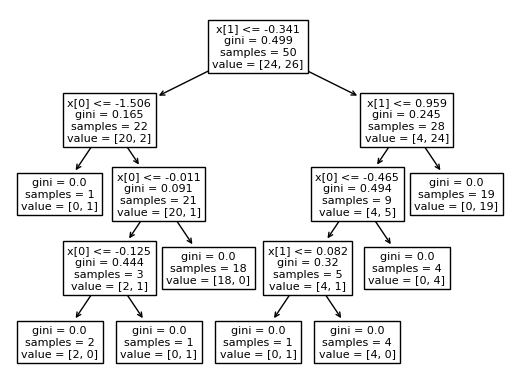

In [22]:
plot_tree(clf2)

[Text(0.35714285714285715, 0.9166666666666666, 'x[0] <= -0.348\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.14285714285714285, 0.75, 'x[1] <= -0.965\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.07142857142857142, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.21428571428571427, 0.5833333333333334, 'x[0] <= -2.031\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[0] <= -2.155\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.07142857142857142, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.21428571428571427, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.4166666666666667, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.5714285714285714, 0.75, 'x[0] <= 0.38\ngini = 0.26\nsamples = 26\nvalue = [4, 22]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6428571428571429, 0.5833333333333334, 'x[0] <= 0.778\ngini

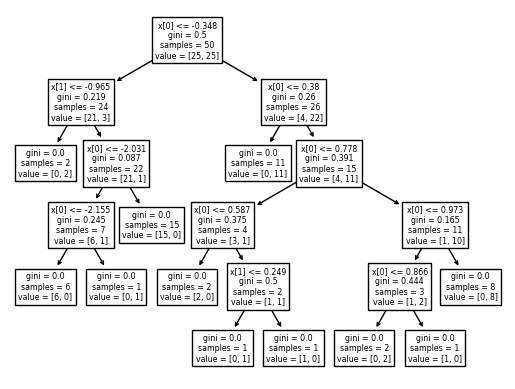

In [23]:
plot_tree(clf3)

In [ ]:
# -1.150917	1.501819	0

In [24]:
clf1.predict(np.array([-1.150917,	1.501819]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf2.predict(np.array([-1.150917,	1.501819]).reshape(1,2))

array([0])

In [25]:
clf3.predict(np.array([-1.150917,	1.501819]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
9,2.232603,0.712561,-0.150005,-0.260618,0.908120,1
25,-0.048432,-3.245020,-1.466550,1.144552,-2.119918,1
42,2.277146,-0.277926,-0.862122,0.215065,0.664704,1
48,1.733907,0.932662,-0.169557,-1.956634,0.919900,0
20,1.615976,2.263879,-3.500950,0.408134,3.292552,0
43,1.886409,-0.017661,-1.230879,-0.609477,1.024885,1
22,0.522241,0.049980,0.464430,-2.143045,0.693574,0
70,2.347736,0.981169,-0.679285,0.787095,-0.488133,1
60,0.759070,0.853935,-3.991747,0.765936,-1.654752,0
44,-0.698989,1.702504,1.342453,-3.123216,1.140621,0
